In [6]:
import requests

url = 'http://203.64.84.150:51888/user5/IMU/s2.csv'  # 替換成實際的文件URL
destination = 'C:/Users/USER/Desktop/醫資標準/s2.csv'  # 替換成想要保存的本地路徑

response = requests.get(url)

with open(destination, 'wb') as file:
    file.write(response.content)

print(f'文件已下載到 {destination}')

文件已下載到 C:/Users/USER/Desktop/醫資標準/s2.csv


In [15]:
import matplotlib.pyplot as plt
import csv
from datetime import datetime

data = []
with open('Xsens DOT7_20231217_114238_438.csv', 'r') as file:
    csv_reader = csv.reader(file)

    # 讀取前十行資料並印出
    for i, row in enumerate(csv_reader):
        if i < 11:
            print(row)
        else:
            # 十行之後的資料儲存至 data
            data.append(row)


['sep=', '']
['DeviceTag:', 'Xsens DOT7']
['FirmwareVersion:', '3.0.0']
['AppVersion:', '2023.6.0']
['SyncStatus:', 'Un-synced']
['OutputRate:', '60Hz']
['FilterProfile:', 'General']
['Measurement Mode:', 'Custom modes - custom mode1']
['StartTime: ', '2023-12-17_11:42:38_431 GMT+8']
['穢 Movella Technologies B. V. 2005-2023']
[]


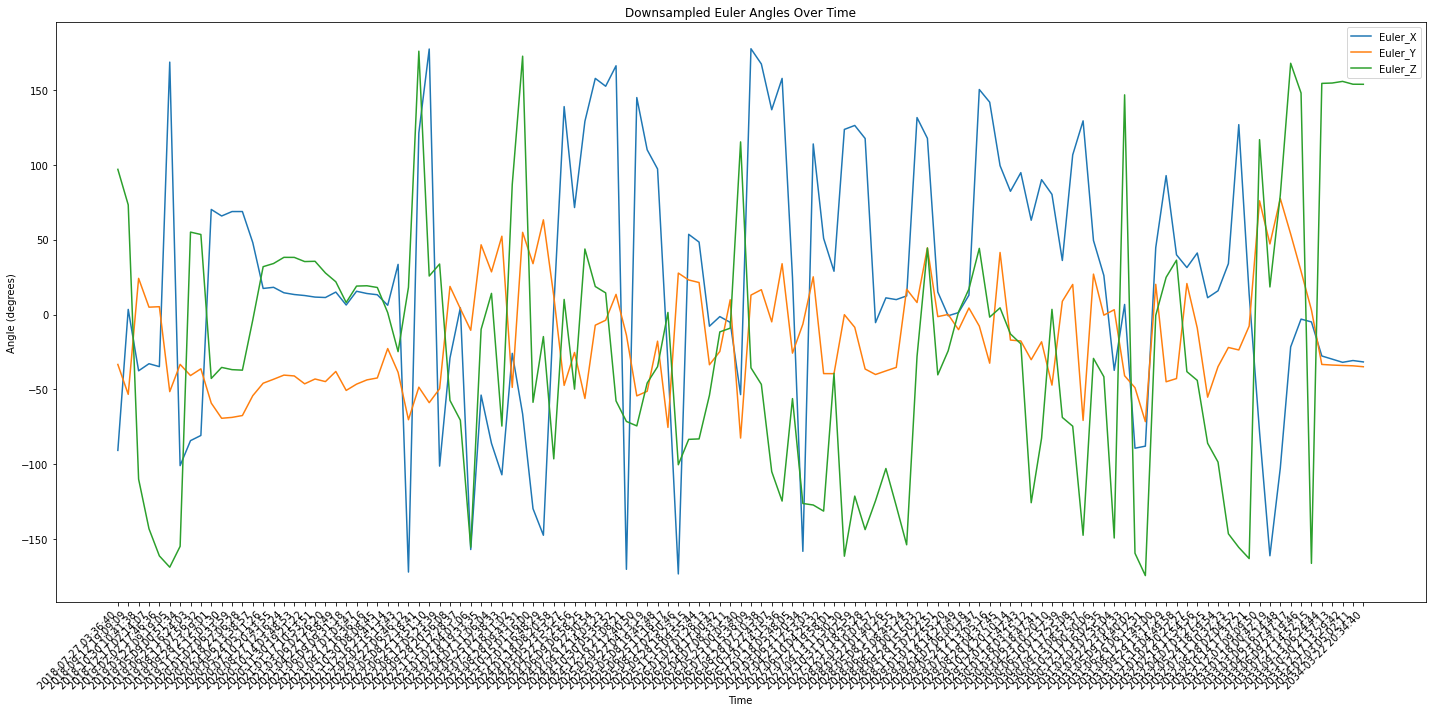

In [18]:
# 提取數據
header = data[0]
data = data[1:]

# 解析時間戳記並轉換為 datetime
timestamps = [datetime.utcfromtimestamp(int(row[1])).strftime('%Y-%m-%d %H:%M:%S') for row in data]

# 提取需要繪製的數據列
euler_x = [float(row[2]) for row in data]
euler_y = [float(row[3]) for row in data]
euler_z = [float(row[4]) for row in data]

# 降採樣資料，以60Hz的輸出速率為例
downsample_rate = int(len(timestamps) / (2 * 60))  # 一小時的資料點數
timestamps_downsampled = timestamps[::downsample_rate]
euler_x_downsampled = euler_x[::downsample_rate]
euler_y_downsampled = euler_y[::downsample_rate]
euler_z_downsampled = euler_z[::downsample_rate]

# 繪製波形圖
plt.figure(figsize=(20, 10))
plt.plot(timestamps_downsampled, euler_x_downsampled, label='Euler_X')
plt.plot(timestamps_downsampled, euler_y_downsampled, label='Euler_Y')
plt.plot(timestamps_downsampled, euler_z_downsampled, label='Euler_Z')

# 添加標籤和標題
plt.xlabel('Time')
plt.ylabel('Angle (degrees)')
plt.title('Downsampled Euler Angles Over Time')
plt.legend()

# 旋轉x轴標籤以防止重叠
plt.xticks(rotation=45, ha='right')

# 顯示圖形
plt.tight_layout()
plt.show()


#資料擷取 imu csv
#資料發布
- 上傳 
    - 資料
    - 描述資料
- 下載
    - 雲端資料搜尋+調閱
    - 分析與紀錄分析結果
#授權與存取控制